# Class Balancing - Traffic Accidents

This notebook explores **2 approaches** to balance the target class:
1. **Undersampling** - Reduce majority class to match minority class size
2. **SMOTE** - Synthetic Minority Over-sampling Technique

Each approach is evaluated using Naive Bayes and KNN classifiers.

In [1]:
import sys
from pandas import read_csv, DataFrame, Series, concat
from matplotlib.pyplot import figure, savefig, show
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

sys.path.insert(1, '../../../../utils')
from dslabs_functions import get_variable_types, NR_STDEV, determine_outlier_thresholds_for_var
from studies import evaluate_and_plot

In [2]:
file_tag = "traffic"
metric="f1"
lab_folder_bal = "lab3_preparation/balancing"
target_name = "crash_type"

train_filename = "../../data/prepared/traffic_best_sca_train.csv"
test_filename = "../../data/prepared/traffic_best_sca_test.csv"

data_train: DataFrame = read_csv(train_filename, na_values="")
data_test: DataFrame = read_csv(test_filename, na_values="")

variable_types: dict[str, list] = get_variable_types(concat([data_train, data_test]))
numeric_vars = variable_types['numeric']

input_df = data_train.copy(deep=True)

print(f"Dataset shape: {input_df.shape}")
print(f"\nClass distribution before balancing:")
print(input_df[target_name].value_counts())
print(f"Ratio: {input_df[target_name].value_counts()[0] / input_df[target_name].value_counts()[1]:.2f}:1")

Dataset shape: (146514, 150)

Class distribution before balancing:
crash_type
0    82163
1    64351
Name: count, dtype: int64
Ratio: 1.28:1


## Approach 1: Undersampling

Randomly reduce the majority class to match the minority class size.

In [3]:
approach_bal1 = "undersampling"

# Separate majority and minority classes
df_majority = input_df[input_df[target_name] == 0]
df_minority = input_df[input_df[target_name] == 1]

print(f"Majority class (0): {len(df_majority)} records")
print(f"Minority class (1): {len(df_minority)} records")

# Undersample majority class to match minority class size
df_majority_undersampled = df_majority.sample(n=len(df_minority), random_state=42)

# Combine minority class with undersampled majority class
data_bal1 = concat([df_majority_undersampled, df_minority])

# Shuffle the dataset
data_bal1 = data_bal1.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"\nClass distribution after undersampling:")
print(data_bal1[target_name].value_counts())
print(f"Dataset size: {len(input_df)} → {len(data_bal1)} ({100*len(data_bal1)/len(input_df):.1f}%)")

Majority class (0): 82163 records
Minority class (1): 64351 records

Class distribution after undersampling:
crash_type
1    64351
0    64351
Name: count, dtype: int64
Dataset size: 146514 → 128702 (87.8%)


## Approach 2: SMOTE (Synthetic Minority Over-sampling Technique)

Generate synthetic samples for the minority class using k-nearest neighbors.

In [4]:
approach_bal2 = "SMOTE"

# Separate features and target
X = input_df.drop(columns=[target_name])
y = input_df[target_name]

print(f"Original class distribution:")
print(y.value_counts())

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine back into DataFrame
data_bal2 = DataFrame(X_resampled, columns=X.columns)
data_bal2[target_name] = y_resampled

print(f"\nClass distribution after SMOTE:")
print(data_bal2[target_name].value_counts())
print(f"Dataset size: {len(input_df)} → {len(data_bal2)} ({100*len(data_bal2)/len(input_df):.1f}%)")

Original class distribution:
crash_type
0    82163
1    64351
Name: count, dtype: int64

Class distribution after SMOTE:
crash_type
1    82163
0    82163
Name: count, dtype: int64
Dataset size: 146514 → 164326 (112.2%)


## Evaluate

Couldn't run MultinomialNB


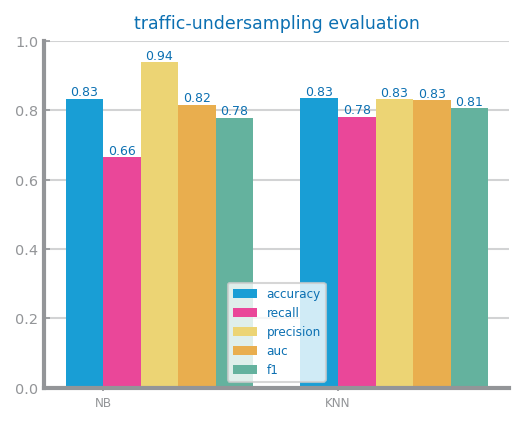

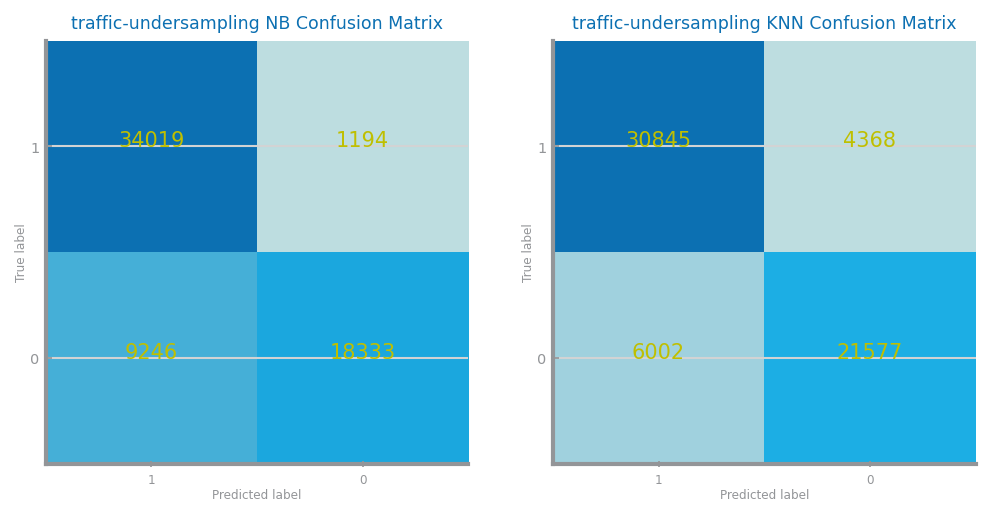

In [5]:
evaluate_and_plot(data_bal1, data_test, lab_folder_bal, file_tag, approach_bal1, target_name, metric=metric)

Couldn't run MultinomialNB


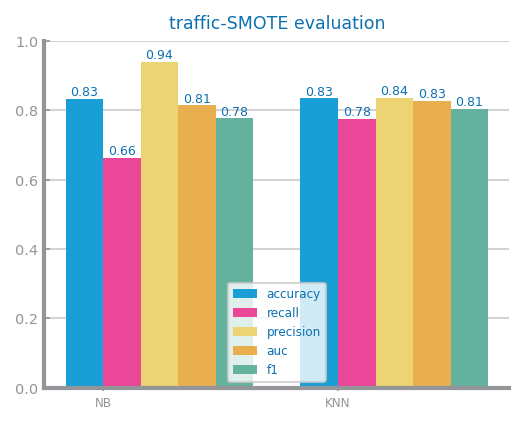

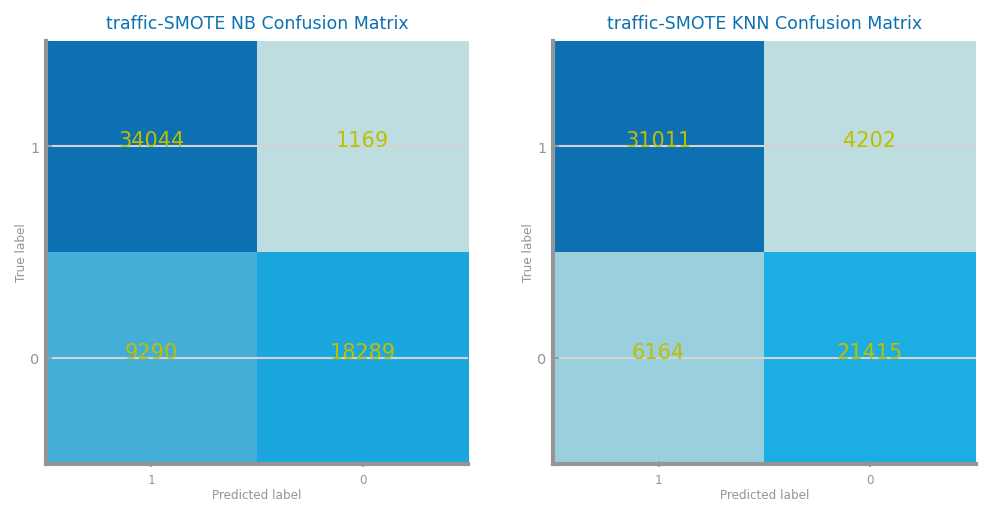

In [6]:
evaluate_and_plot(data_bal2, data_test, lab_folder_bal, file_tag, approach_bal2, target_name, metric=metric)

## Save Best Result

Based on evaluation metrics, save the best performing approach.

In [7]:
# Uncomment to save individual results
data_bal1.to_csv(f"../../data/prepared/{file_tag}_balancing_{approach_bal1}_train.csv", index=False)
data_bal2.to_csv(f"../../data/prepared/{file_tag}_balancing_{approach_bal2}_train.csv", index=False)

# approach 2 was best knn
best_df_bal_train = data_bal2.copy()
best_df_bal_test = data_test.copy()
best_approach_bal = approach_bal2
best_df_bal_train.to_csv(f"../../data/prepared/traffic_best_bal_train.csv", index=False)
best_df_bal_test.to_csv(f"../../data/prepared/traffic_best_bal_test.csv", index=False)
print(f"Best approach: {best_approach_bal}")
print(f"Shape: {best_df_bal_train.shape} {best_df_bal_test.shape}")

Best approach: SMOTE
Shape: (164326, 150) (62792, 150)
